dataset：构造数据集,索引

dataloader：拿出mini-batch



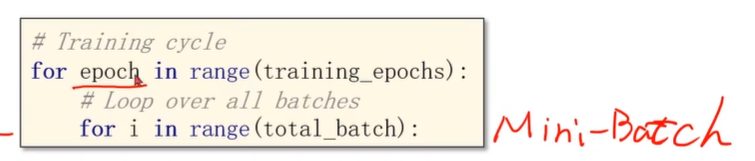

epoch：一个epoch等于使用训练集中的全部样本训练一次，一个训练周期

batch_size：一个batch_size等于使用训练集中的一部分样本训练一次，一个训练批次

iteration: 一个iteration等于使用一个batch_size的样本训练一次,一个迭代。等于总样本数除以批量大小




shuffle:打乱

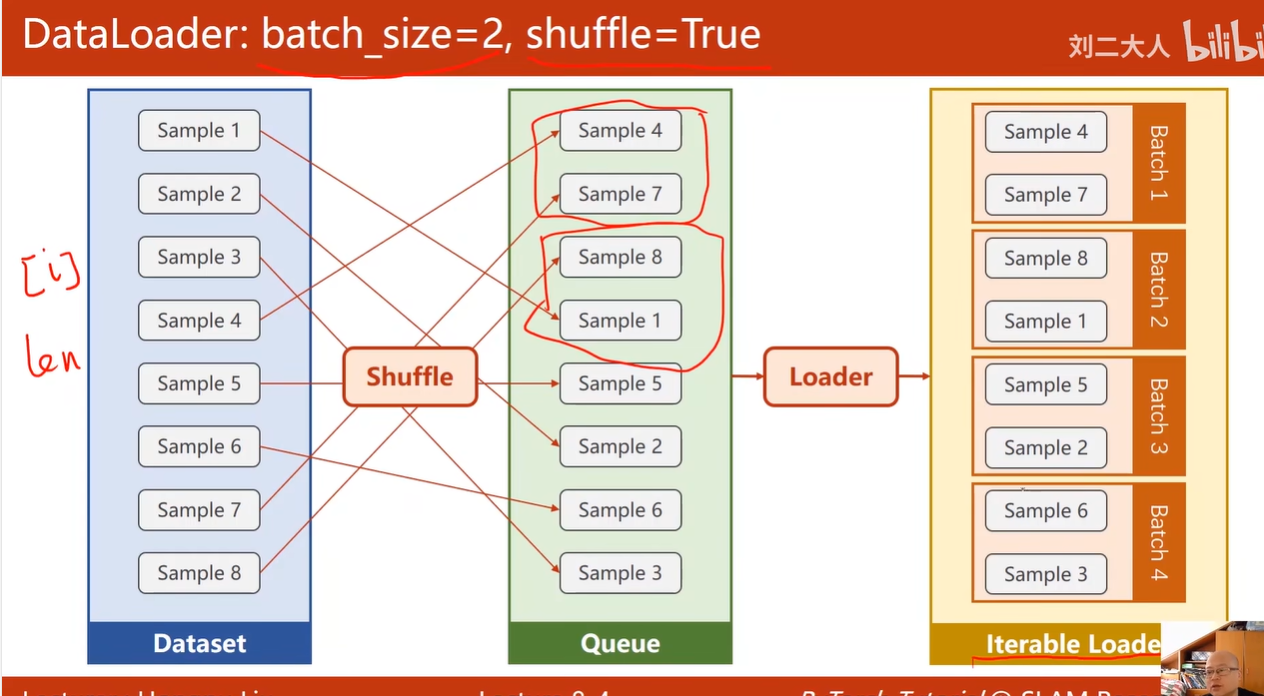

dataset是抽象类，不能实例化

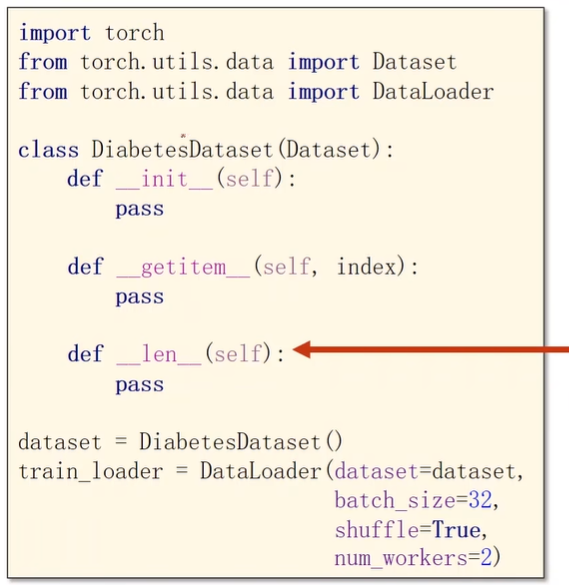

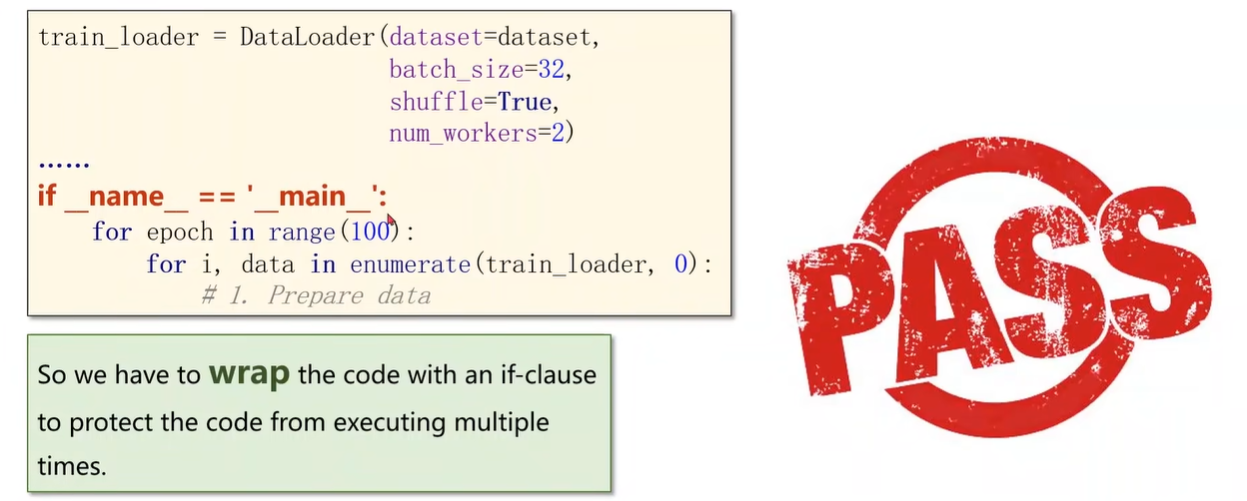

In [14]:
import torch
import numpy as np
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from torch.utils.data import Dataset, DataLoader

In [15]:
class Model(torch.nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.linear1 = torch.nn.Linear(8, 6)
        self.linear2 = torch.nn.Linear(6, 4)
        self.linear3 = torch.nn.Linear(4, 1)
        self.activate = torch.nn.Sigmoid()

    def forward(self, x):
        x = self.activate(self.linear1(x))
        x = self.activate(self.linear2(x))
        x = self.activate(self.linear3(x))
        return x

model = Model()

In [20]:
class DiabetesDataset(Dataset):
    def __init__(self, filepath):
        xy = pd.read_csv(filepath, delimiter=',', dtype=np.float32)
        self.len = xy.shape[0]  # xy.shape[0] 表示取数组的第 0 维长度，即样本的总数量 N
        self.x_data = torch.tensor(xy.iloc[:, :-1].values, dtype=torch.float32)
        self.y_data = torch.tensor(xy.iloc[:, [-1]].values, dtype=torch.float32)

    def __getitem__(self, index):
        return self.x_data[index], self.y_data[index]

    def __len__(self):
        return self.len

dataset = DiabetesDataset('E:\\深度学习\\刘二\\数据集\\diabetes.csv')
train_loader = DataLoader(dataset=dataset, batch_size=32, shuffle=True)#, num_workers=2)

In [17]:
criterion = torch.nn.BCELoss(size_average=True)

optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

d:\soft\anaconda\envs\d2l\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


In [21]:
for epoch in range(100):
    for i, data in enumerate(train_loader, 0):
        # 1. Prepare data
        inputs, labels = data#dataloder自动转换为tensor
        # 2. Forward
        y_pred = model(inputs)
        loss = criterion(y_pred, labels)
        print(epoch, i, loss.item())
        # 3. Backward
        optimizer.zero_grad()
        loss.backward()
        # 4. Update
        optimizer.step()

0 0 0.6798372864723206
0 1 0.6733062267303467
0 2 0.673743724822998
0 3 0.6571767330169678
0 4 0.6883735656738281
0 5 0.6798611283302307
0 6 0.6890532970428467
0 7 0.6646267771720886
0 8 0.6723331212997437
0 9 0.6755719184875488
0 10 0.682856559753418
0 11 0.6655826568603516
0 12 0.6683957576751709
0 13 0.6701378226280212
0 14 0.6789881587028503
0 15 0.659231424331665
0 16 0.691877007484436
0 17 0.6879409551620483
0 18 0.6638944149017334
0 19 0.6615517139434814
0 20 0.6790555119514465
0 21 0.66755610704422
0 22 0.6847187280654907
0 23 0.658932089805603
1 0 0.6730244159698486
1 1 0.6735734939575195
1 2 0.6451354026794434
1 3 0.6618320941925049
1 4 0.6764976978302002
1 5 0.6501392126083374
1 6 0.6788496375083923
1 7 0.6910577416419983
1 8 0.6449631452560425
1 9 0.6735820174217224
1 10 0.6666873097419739
1 11 0.686630129814148
1 12 0.6954777836799622
1 13 0.6886293888092041
1 14 0.6538335680961609
1 15 0.6652005314826965
1 16 0.6378517150878906
1 17 0.6665842533111572
1 18 0.6115621328353

In [23]:
inputs

tensor([[1.0000e+01, 1.1500e+02, 9.8000e+01, 0.0000e+00, 0.0000e+00, 2.4000e+01,
         1.0220e+00, 3.4000e+01],
        [2.0000e+00, 1.1100e+02, 6.0000e+01, 0.0000e+00, 0.0000e+00, 2.6200e+01,
         3.4300e-01, 2.3000e+01],
        [9.0000e+00, 1.2400e+02, 7.0000e+01, 3.3000e+01, 4.0200e+02, 3.5400e+01,
         2.8200e-01, 3.4000e+01],
        [0.0000e+00, 1.3100e+02, 8.8000e+01, 0.0000e+00, 0.0000e+00, 3.1600e+01,
         7.4300e-01, 3.2000e+01],
        [1.0000e+00, 8.8000e+01, 3.0000e+01, 4.2000e+01, 9.9000e+01, 5.5000e+01,
         4.9600e-01, 2.6000e+01],
        [9.0000e+00, 1.0200e+02, 7.6000e+01, 3.7000e+01, 0.0000e+00, 3.2900e+01,
         6.6500e-01, 4.6000e+01],
        [8.0000e+00, 1.0500e+02, 1.0000e+02, 3.6000e+01, 0.0000e+00, 4.3300e+01,
         2.3900e-01, 4.5000e+01],
        [1.0000e+00, 1.0600e+02, 7.6000e+01, 0.0000e+00, 0.0000e+00, 3.7500e+01,
         1.9700e-01, 2.6000e+01],
        [3.0000e+00, 1.7000e+02, 6.4000e+01, 3.7000e+01, 2.2500e+02, 3.4500e+01,

In [25]:
labels

tensor([[0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.]])

In [22]:
model.eval()
with torch.no_grad():
    # 增加维度，变为 [1, 8]，适配模型输入要求
    x1 = torch.tensor([6,148,72,35,0,33.6,0.627,50], dtype=torch.float32).unsqueeze(0)  
    y1 = model(x1)
    print(y1.data)

tensor([[0.3674]])


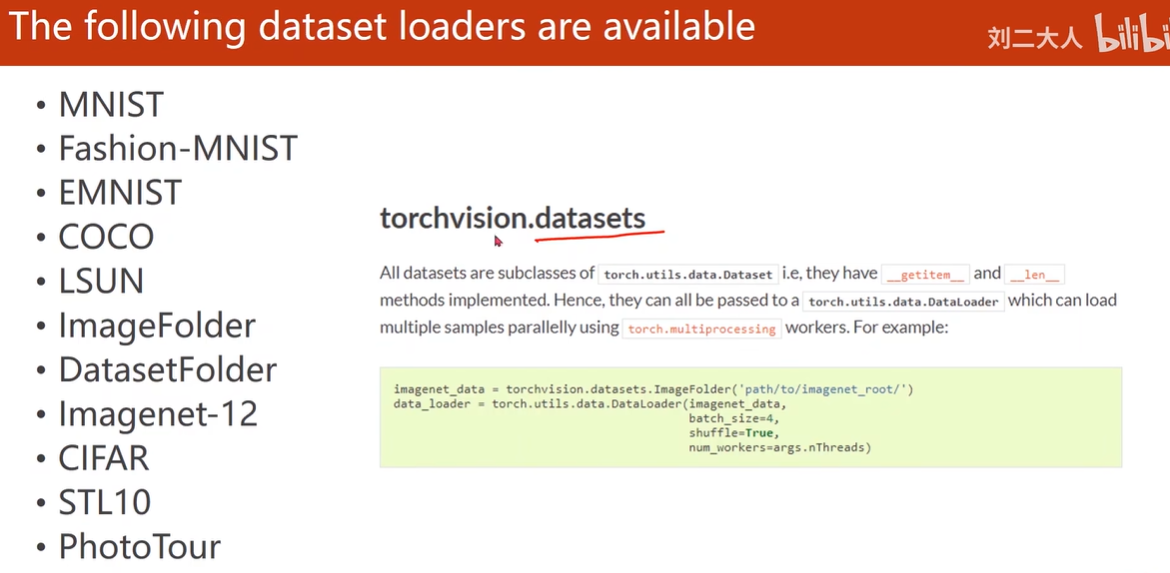

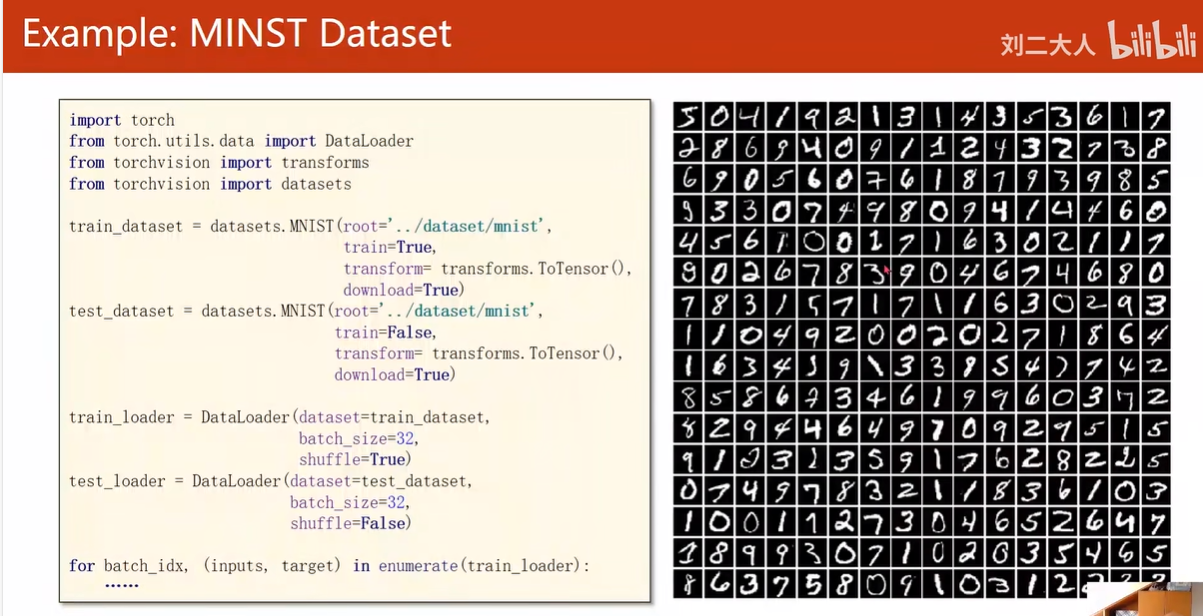